# Python for Data Science Quiz

## This quiz is to test your understanding on the concepts learnt in class during the 
## Python for Data Science Course. 
## Background of the data - The dataset to be used for the quiz pertains to the 
## number of hospitalisations under the scheme Ayushman Bharat - Pradhan 
## Mantri Jan Arogya Yojana (AB-PMJAY), this data is as on 19 June, 2019.
## The data contains number of cases of hospitalisation in public and private hospitalisations 
## state/ UT wise and on an all India level.
## PMJAY is a scheme which provides health cover of Rs. 5 Lakhs per family per year, for 
## secondary and tertiary care hospitalization across public and private empaneled hospitals
## in India. State/UT contains the list of states and union territories, Public column contains
## hospitalisations in public hospitals and Private column contains list of hospitalisations in 
## private hospitals. 

In [3]:
## Standard Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Question 1: Import the dataset.

In [4]:
hosp = pd.read_csv("C:\\Users\\SAHITHYA AAKULA\\OneDrive\\Desktop\\Data science case study\\case study 8\\hospitalisations.csv")

In [5]:
hosp.head()

,State/UT,Private,Public
0,Andaman and Nicobar Islands,1.0,21.0
1,Andhra Pradesh,97863.0,34385.0
2,Arunachal Pradesh,5.0,630.0
3,Assam,14350.0,33553.0
4,Bihar,11747.0,34814.0


## Question 2: How many rows and columns does the data set have?

In [6]:
#Checking the dimensions of the data set
print('The dataset has {} rows and {} columns'.format(hosp.shape[0],hosp.shape[1]))
print('\n')
hosp.info()

The dataset has 32 rows and 3 columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State/UT  32 non-null     object 
 1   Private   30 non-null     float64
 2   Public    30 non-null     float64
dtypes: float64(2), object(1)
memory usage: 900.0+ bytes


## Question 3: Does the data set have missing values? If yes, how many?

In [7]:
#Looking at the above output, it seems there are missing values in the data set, let's check the same.
hosp.isnull().sum()

State/UT    0
Private     2
Public      2
dtype: int64

In [8]:
hosp

,State/UT,Private,Public
0,Andaman and Nicobar Islands,1.0,21.0
1,Andhra Pradesh,97863.0,34385.0
2,Arunachal Pradesh,5.0,630.0
3,Assam,14350.0,33553.0
4,Bihar,11747.0,34814.0
5,Chandigarh,302.0,509.0
6,Chhattisgarh,411814.0,142123.0
7,Dadra and Nagar Haveli,782.0,10940.0
8,Daman and Diu,984.0,3343.0
9,Goa,1033.0,382.0


## Question 4: Drop the NA values.

In [9]:
hosp.dropna(axis=0, inplace=True)
# axis=0 means remove rows (with NA values) and inplace=True means that it should remove it in the original place. 
# If you give inplace= False (by default), then it will return a copy of the values and won't make the NA removal in the 
# original data frame.

In [10]:
# Checking again to see of NA values got removed or not.
hosp.isnull().sum()

State/UT    0
Private     0
Public      0
dtype: int64

## Question 5: Create a new column Total which contains a sum of private and public
## hospitalisations. So the column Total should be a summation of the two columns
## Public and Private.

In [11]:
hosp['Total'] = hosp['Public'] + hosp['Private']

In [12]:
# Re-checking if the command produced the desired result or not.
hosp.head()

,State/UT,Private,Public,Total
0,Andaman and Nicobar Islands,1.0,21.0,22.0
1,Andhra Pradesh,97863.0,34385.0,132248.0
2,Arunachal Pradesh,5.0,630.0,635.0
3,Assam,14350.0,33553.0,47903.0
4,Bihar,11747.0,34814.0,46561.0


## Question 6: Which State or UT is the unhealthiest? (i.e. maximum number of hospitalisations) 
## HINT : Do not include Grand Total

In [13]:
hosp.sort_values(by=['Total'],ascending=False).head(3)
# sort_values() is used to sort the data frame according to your preferences.
# Using the by argument, you can sort the values according to a column.
# ascending = False sorts the data frame in descending order.

,State/UT,Private,Public,Total
31,Grand Total,1697117.0,1238196.0,2935313.0
6,Chhattisgarh,411814.0,142123.0,553937.0
16,Kerala,131557.0,391079.0,522636.0


## Question 7: Chhattisgarh accounts for roughly 18% share in the total hospitalisations in India (assuming these are the only states/UTs in India). True for False?

In [14]:
hosp[hosp['State/UT']=='Chhattisgarh']

,State/UT,Private,Public,Total
6,Chhattisgarh,411814.0,142123.0,553937.0


In [15]:
hosp[hosp['State/UT']=='Grand Total']

,State/UT,Private,Public,Total
31,Grand Total,1697117.0,1238196.0,2935313.0


In [16]:
553937/2935313*100

18.87147980470907

## Question 8: In Dadra and Nagar Haveli, which type of hospitals do people prefer?

In [17]:
hosp[hosp['State/UT']=='Dadra and Nagar Haveli']

,State/UT,Private,Public,Total
7,Dadra and Nagar Haveli,782.0,10940.0,11722.0


## Question 9: Plot the total hospitalisations in a plot of your choice and comment on the 
## healthiest State/UT. (Assuming that the only parameter for Healthiest is the number of 
## hospitalisations only)

C:\Users\SAHITHYA AAKULA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


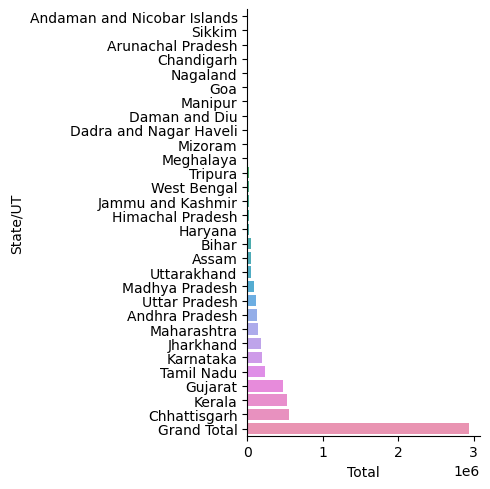

In [18]:
sns.catplot(x="Total", y="State/UT", kind="bar", data=hosp.sort_values(by='Total',ascending=True),height=5)
plt.show()

In [19]:
# From the above plot it is not very clear which is the healthiest state. 
# So lets remove the Grand Total so that we can have a detailed view into the states/UT.
hosp_copy=hosp.iloc[:-1,:] # [2] because the index of Grand Total is 2
hosp_copy.head()

,State/UT,Private,Public,Total
0,Andaman and Nicobar Islands,1.0,21.0,22.0
1,Andhra Pradesh,97863.0,34385.0,132248.0
2,Arunachal Pradesh,5.0,630.0,635.0
3,Assam,14350.0,33553.0,47903.0
4,Bihar,11747.0,34814.0,46561.0


In [20]:
# Let's try to refine it further and plot it.
finding_healthy=hosp_copy.groupby(['State/UT']).sum()['Total'].sort_values()
finding_healthy.index

Index(['Andaman and Nicobar Islands', 'Sikkim', 'Arunachal Pradesh',
       'Chandigarh', 'Nagaland', 'Goa', 'Manipur', 'Daman and Diu',
       'Dadra and Nagar Haveli', 'Mizoram', 'Meghalaya', 'Tripura',
       'West Bengal', 'Jammu and Kashmir', 'Himachal Pradesh', 'Haryana',
       'Bihar', 'Assam', 'Uttarakhand', 'Madhya Pradesh', 'Uttar Pradesh',
       'Andhra Pradesh', 'Maharashtra', 'Jharkhand', 'Karnataka', 'Tamil Nadu',
       'Gujarat', 'Kerala', 'Chhattisgarh'],
      dtype='object', name='State/UT')

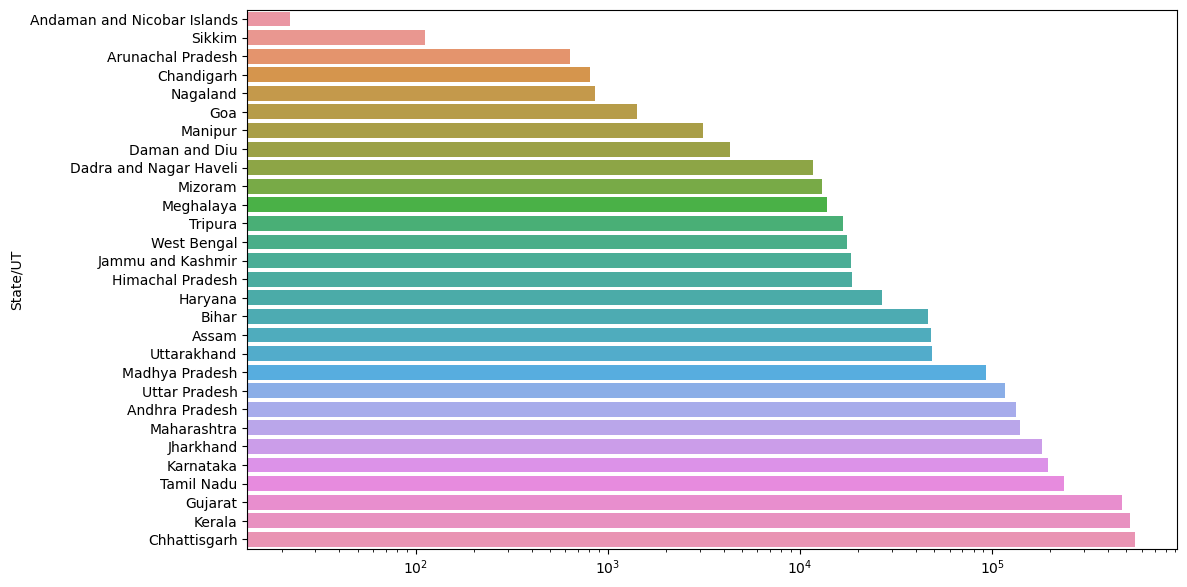

In [21]:
plt.figure(figsize=(12,7))
sns.barplot(x=finding_healthy.values, y=finding_healthy.index)
plt.xscale('log') #This rescales the x-axis so as to clarify out plot more to bring out the smaller values, 
# if you notice the x-axis in this plot vs the x-axis in the previous plot, you'll see that the values have been collapsed a bit.

## Question 10: Public Hospitalisations are more on an all India level as compared to state/UT level. True or False? 
## HINT: Calculate the percentage of public hospitalisation (public/total), then find out the average percentage of all states using the mean() function. Compare this average percentage (state) with the grand total (all India) percentage and comment.

In [22]:
hosp['Public_percentage']=(hosp['Public']/hosp['Total'])

In [23]:
hosp

,State/UT,Private,Public,Total,Public_percentage
0,Andaman and Nicobar Islands,1.0,21.0,22.0,0.954545
1,Andhra Pradesh,97863.0,34385.0,132248.0,0.260004
2,Arunachal Pradesh,5.0,630.0,635.0,0.992126
3,Assam,14350.0,33553.0,47903.0,0.700436
4,Bihar,11747.0,34814.0,46561.0,0.747707
5,Chandigarh,302.0,509.0,811.0,0.627620
6,Chhattisgarh,411814.0,142123.0,553937.0,0.256569
7,Dadra and Nagar Haveli,782.0,10940.0,11722.0,0.933288
8,Daman and Diu,984.0,3343.0,4327.0,0.772591
9,Goa,1033.0,382.0,1415.0,0.269965


In [24]:
# Lets create a percentage column in the Hosp_copy data frame where grand total row has been dropped.
hosp_copy['Public_percentage']=(hosp_copy['Public']/hosp_copy['Total'])
hosp_copy

C:\Users\SAHITHYA AAKULA\AppData\Local\Temp\ipykernel_31616\130809442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hosp_copy['Public_percentage']=(hosp_copy['Public']/hosp_copy['Total'])


,State/UT,Private,Public,Total,Public_percentage
0,Andaman and Nicobar Islands,1.0,21.0,22.0,0.954545
1,Andhra Pradesh,97863.0,34385.0,132248.0,0.260004
2,Arunachal Pradesh,5.0,630.0,635.0,0.992126
3,Assam,14350.0,33553.0,47903.0,0.700436
4,Bihar,11747.0,34814.0,46561.0,0.747707
5,Chandigarh,302.0,509.0,811.0,0.627620
6,Chhattisgarh,411814.0,142123.0,553937.0,0.256569
7,Dadra and Nagar Haveli,782.0,10940.0,11722.0,0.933288
8,Daman and Diu,984.0,3343.0,4327.0,0.772591
9,Goa,1033.0,382.0,1415.0,0.269965


In [25]:
hosp_copy['Public_percentage'].mean()

0.590638596657387

## Question 11: Which States/UTs have more than 50000 hospitalisations?

In [26]:
hosp_copy[hosp_copy.Total>50000].sort_values(by='Total',ascending=False)['State/UT']

6       Chhattisgarh
16            Kerala
10           Gujarat
26        Tamil Nadu
15         Karnataka
14         Jharkhand
19       Maharashtra
1     Andhra Pradesh
28     Uttar Pradesh
18    Madhya Pradesh
Name: State/UT, dtype: object

## Question 12: Which state reported exactly 1 case of private hospitalisation?

In [27]:
hosp_copy[hosp_copy['Private']==1]['State/UT']

0    Andaman and Nicobar Islands
Name: State/UT, dtype: object

## Question 13: Which State/UT has maximum number of people admitted to public hospitals?

In [28]:
hosp_copy[hosp_copy['Public']==hosp_copy['Public'].max()]['State/UT']

16    Kerala
Name: State/UT, dtype: object

## Question 14: Which state among Tripura and Gujarat witnessed more hospitalisations? 
## (in absolute numbers)

In [29]:
# Checking the number of hospitalisations in Tripura
hosp[hosp['State/UT']=='Tripura']

,State/UT,Private,Public,Total,Public_percentage
27,Tripura,90.0,16702.0,16792.0,0.99464


In [30]:
# Checking the number of hospitalisations in Gujarat
hosp[hosp['State/UT']=='Gujarat']

,State/UT,Private,Public,Total,Public_percentage
10,Gujarat,379379.0,94845.0,474224.0,0.2


## Question 15: Are there any extreme values/ outliers present in this data set? Do these
## values impact the analysis?

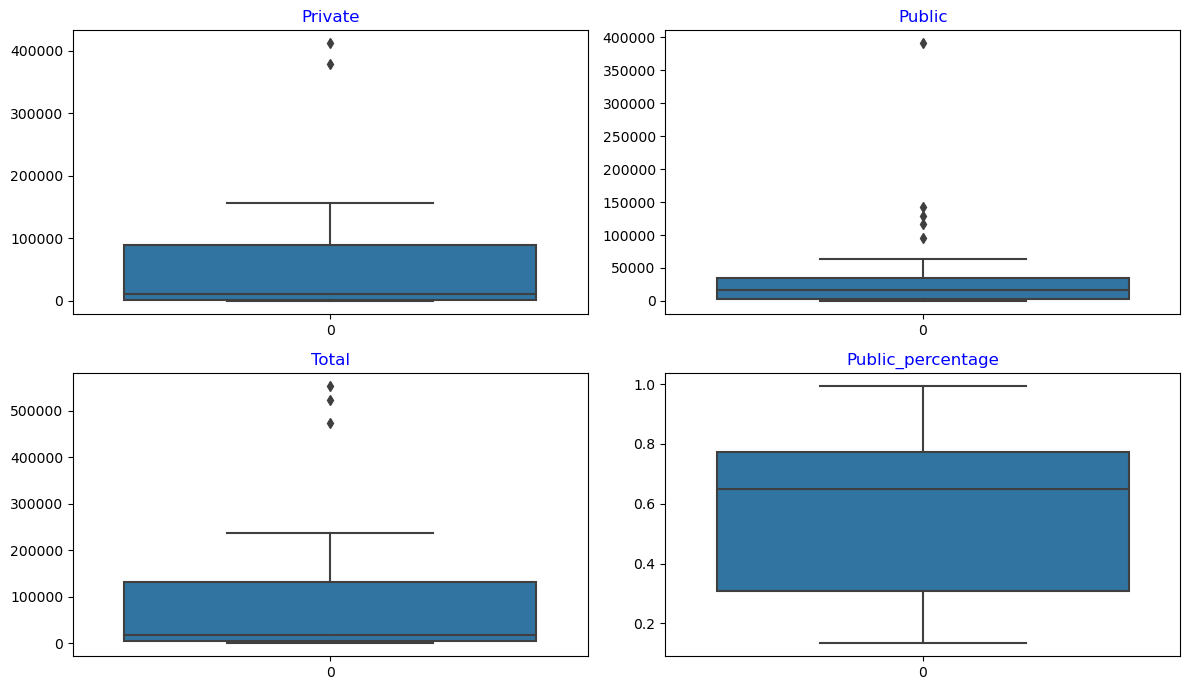

In [31]:
#Plotting Boxplots for Outlier visual
data_plot=hosp_copy[hosp_copy.dtypes[hosp_copy.dtypes!='object'].index]
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
   ax=fig.add_subplot(2,2,i+1)
   sns.boxplot(data_plot[data_plot.columns[i]])
   ax.set_title(data_plot.columns[i],color='Blue')
plt.tight_layout()

In [32]:
# Let's look at an alternative way for identifying outliers.
# Start by getting the five point summaries.
hosp_copy.describe()

,Private,Public,Total,Public_percentage
count,29.000000,29.000000,29.000000,29.000000
mean,58521.275862,42696.413793,101217.689655,0.590639
std,104692.326879,78095.331456,158445.699356,0.276421
min,1.000000,21.000000,22.000000,0.133319
25%,725.000000,3343.000000,4327.000000,0.309991
50%,11747.000000,16461.000000,18621.000000,0.650881
75%,89987.000000,34385.000000,132248.000000,0.772591
max,411814.000000,391079.000000,553937.000000,0.994640


THE END!